<a href="https://colab.research.google.com/github/kiranrode/README.md/blob/master/Logistic_Regression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3: Logistic Regression, Classification and Accuracy

Now that we know what it means to fit a model, we are going to dive into the second type of data prediction which is called **classification**.

## Learning Objectives:
* What is classification?
* What is logistic regression?
* A visual introduction to non-convex optimization.
* Fit a logistic regression model yourself!
* Fit a logistic regression model using the Scikit Learn library.
* Fake News!! What is accuracy, true/false positives/negatives, precision, recall?
* Generalizing logistic to multiple classes.
* Visualize 2D decision boundaries.

## Definitions
* **Accuracy** - The number of guesses or predictions correct / total number of predictions.
* **Ground Truth** - Used in reference to our prediction. A ground truth is the correct value for our our prediction.
* **True Positive** - When we predicted 1 and the ground truth was 1.
* **True Negative** - When we predicted 0 and the ground truth was 0.
* **False Positive** - When we predicted 1 and the ground truth was 0.
* **False Negative** - When we predicted 0 and the ground truth was 1.

## Challenges
1. Classify dummy data
2. Classify if a person will survive the titanic and why
3. Plot nominal data and try to determine the cutoff
4. Plot decision boundaries

### What is Classification?

![alt text](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2014/09/Classification-and-Regression-dataaspirant.png?resize=690%2C518)

**Classification (as opposed to regression) is used when our target is categorical. i.e. pass/fail.**


### What is Logistic Regression?

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, positive, success, etc.) or 0 (no, negative, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

Unlike linear regression, logistic regression can directly predict probabilities (values that are restricted to the (0,1) interval); furthermore, those probabilities are well-calibrated when compared to the probabilities predicted by some other classifiers, such as Naive Bayes. Logistic regression preserves the marginal probabilities of the training data. The coefficients of the model also provide some hint of the relative importance of each input variable.

[source](ttps://medium.com/greyatom/logistic-regression-89e496433063)

**Applications:**
1. Marketing applications such as prediction of a customer’s propensity to purchase a product or halt a subscription.
2. Model whether the customer is going to “Default” or “Not Default” on a credit card.



![alt text](https://miro.medium.com/max/700/0*j4b6G61h6FGvaS16.jpg)

## Fitting a Logistic Regression Model

#### The Model (Sigmoid Function)
$$y = \frac{e^{b+wx}}{1 + e^{b+wx}}$$


#### Score Function: Accuracy
For now, we will be using **accuracy** as the score function which is defined as:
$$\frac{|\hat{y} =y|}{|\hat{y}|}$$

In words, accuracy is the number of predictions we got right!

In [0]:
def accuracy(y_true, y_pred):
  return (y_true == y_pred).sum() / len(y_pred)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
def logistic_predict_prob(w, b, x):
  return (np.e**(b+w*x)) / (1 + np.e**(b+w*x))

def logistic_predict_binary(w, b, x):
  return logistic_predict_prob(w, b, x) >= 0.5

In [0]:
def dummy_data():
  x1 = np.sort(np.random.uniform(0, 7, 50))
  x2 = np.sort(np.random.uniform(4, 10, 50))
  x = np.concatenate([x1, x2])
  y = np.concatenate([np.zeros(50), np.ones(50)])
  return x, y
# Set constants for plotting
w_min, w_max, w_step = 0, 3, .5
b_min, b_max, b_step = -10, 5, .5
w_range = np.linspace(w_min, w_max, 100)
b_range = np.linspace(b_min, b_max, 100)
x, y = dummy_data()
x_range = np.linspace(min(x), max(x), 100)

In [0]:
def last0_idx(a):
  last0x = np.where(~a)[0]
  return max(last0x) if len(last0x) > 0 else None

def plot_model(w, b):
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Past Users")
    y_hat = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    plt.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy(y, predictions)))
    plt.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    plt.xlabel("Months the user has used the service")
    plt.ylabel("Probability of user staying on the service")
    if 0 in predictions:
      last0x = x_range[last0_idx(y_hat > 0.5)]
      plt.annotate(
        "Predict that a user\n"
        "with more than {:.1f} months\n"
        "using the service will stay."
        .format(last0x),
        (last0x+.3, 0.5)
      )
    plt.legend(loc='upper left')
    plt.title('Fit Model To Data')

In [0]:
# Some libraries we need for interactive plotting
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits import mplot3d

### Hand fit a model

In [12]:
# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
interact(
  plot_model,
  w = widgets.FloatSlider(value=1, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-8, min=b_min, max=b_max, step=b_step)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, step=0.5), FloatSlider(value=-8.0, desc…

Adjust the parameters: w and b to fit the model to the data!


### Have the computer fit the model

Computer Fit Model: w=0.8, b=-4.1


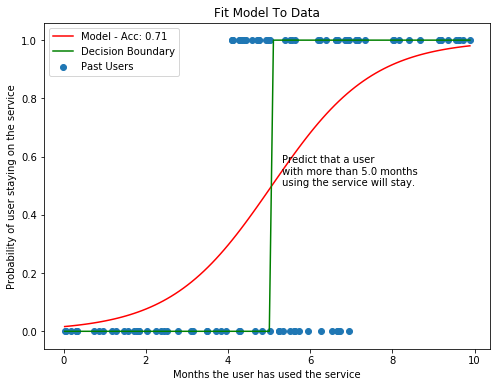

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs").fit(x.reshape(-1, 1), y)
w, b = model.coef_[0][0], model.intercept_[0]

plot_model(w, b)
print("Computer Fit Model: w={:.1f}, b={:.1f}".format(w, b))

## In-depth Classification Performance Reporting with Fake News Example
- false/true negatives
- false/true positives
- percision
- recall
- f1

![alt text](https://d1i4t8bqe7zgj6.cloudfront.net/11-18-2016/t_1479489048302_name_20161119_zuckerberg1.jpg)

Facebook has been in the news a lot for their policies on fake news... 
Maybe you believe that facebook should crack down more on fake news so it doesn't spread across the globe. Maybe you feel that they are cracking down too hard and taking down people's posts that shouldn't be taken down. *THIS* is a matter of precision versus recall!

If we cared most about **precision**, we would tune our machine learning algorithm to only take down fake news stories that we were ABSOLUTELY sure was fake news. By doing this, we may possibly miss some fake news stories.

If we cared most about **recall**, we would tune our machine learning algorithm to take down ANY POSSIBLE fake news stories. We would for sure take down all fake news stories but may take down some non-fake news in the process.


Read More: [Why Accuracy Is Not Enough](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

### False/True Negatives/Positives

* **True Positive** - When we predicted positive/1 (fake news) and the ground truth was positive/1 (fake news).
* **True Negative** - When we predicted negative/0 (not fake news) and the ground truth was negative/0 (not fake news).
* **False Positive** - When we predicted positive/1 (fake news) and the ground truth was negative/0 (not fake news).
* **False Negative** - When we predicted negative/0 (not fake news) and the ground truth was positive/1 (fake news).


In [0]:
def true_pos(y_truth, y_pred):
  return np.logical_and(y_pred == 1, y_truth == 1)

def true_neg(y_truth, y_pred):
  return np.logical_and(y_pred == 0, y_truth == 0)

def false_pos(y_truth, y_pred):
  return np.logical_and(y_pred == 1, y_truth == 0)

def false_neg(y_truth, y_pred):
  return np.logical_and(y_pred == 0, y_truth == 1)

In [17]:
def plot_model(w, b):
    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
    y_hat = logistic_predict_binary(w, b, x)
    tp, fp = true_pos(y, y_hat).sum(), false_pos(y, y_hat).sum()
    fn, tn = false_neg(y, y_hat).sum(), true_neg(y, y_hat).sum()
    ax1.scatter(x[false_neg(y, y_hat)], y[false_neg(y, y_hat)], label=f"False Neg: {fn}", c='orange', alpha=.3)
    ax1.scatter(x[false_pos(y, y_hat)], y[false_pos(y, y_hat)], label=f"False Pos: {fp}", c='orange', alpha=.3, marker="x")
    ax1.scatter(x[true_neg(y, y_hat)], y[true_neg(y, y_hat)], label=f"True Neg: {tn}", c='blue', marker="x")
    ax1.scatter(x[true_pos(y, y_hat)], y[true_pos(y, y_hat)], label=f"True Pos: {tp}", c='blue')
    # Plot Model
    y_hat = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    accuracy = (predictions == y).sum() / len(predictions)
    ax1.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy))
    ax1.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    ax1.set_xlabel("Fake News Score")
    ax1.set_ylabel("Probability of Story Being Fake News")
    ax1.legend(loc='upper left')
    ax1.set_title('Fake News Classifier')

# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
interact(
  plot_model,
  w = widgets.FloatSlider(value=1, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-8, min=b_min, max=b_max, step=b_step)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, step=0.5), FloatSlider(value=-8.0, desc…

Adjust the parameters: w and b to fit the model to the data!


### Confusion Matrix
- A confusion matrix is a way to visualize our model's success. In short, you want the highest numbers along the diagonal (correct guesses). We'd like 0's everywhere else!

![alt text](https://miro.medium.com/max/1024/1*-BkpqhN-5fPicMifDQ0SwA.png)

Adjust the model below to achieve the highest numbers along the diagonals!


In [18]:
def plot_model(w, b):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    y_hat = logistic_predict_binary(w, b, x)
    tp, fp = true_pos(y, y_hat).sum(), false_pos(y, y_hat).sum()
    fn, tn = false_neg(y, y_hat).sum(), true_neg(y, y_hat).sum()
    ax1.scatter(x[false_neg(y, y_hat)], y[false_neg(y, y_hat)], label=f"False Neg: {fn}", c='orange', alpha=.3)
    ax1.scatter(x[false_pos(y, y_hat)], y[false_pos(y, y_hat)], label=f"False Pos: {fp}", c='orange', alpha=.3, marker="x")
    ax1.scatter(x[true_neg(y, y_hat)], y[true_neg(y, y_hat)], label=f"True Neg: {tn}", c='blue', marker="x")
    ax1.scatter(x[true_pos(y, y_hat)], y[true_pos(y, y_hat)], label=f"True Pos: {tp}", c='blue')
    # Plot Confusion Matrix
    matrix = [
          [tp, fp],
          [fn, tn]
    ]
    df = pd.DataFrame(
        matrix,
        index = ["Guessed\nFake News", "Guessed\nNot Fake News"],
        columns = ["Actually Fake News", "Actually Not Fake News"]
    )
    ax2.set_title("Confusion Matrix")
    sns.heatmap(df, annot=True, cmap="Blues", ax=ax2, cbar=False)
    # Plot Model
    y_hat = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    accuracy = (predictions == y).sum() / len(predictions)
    ax1.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy))
    ax1.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    ax1.set_xlabel("Fake News Score")
    ax1.set_ylabel("Probability of Story Being Fake News")
    ax1.legend(loc='upper left')
    ax1.set_title('Fake News Classifier', fontsize=20)

# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
interact(
  plot_model,
  w = widgets.FloatSlider(value=1, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-8, min=b_min, max=b_max, step=b_step)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, step=0.5), FloatSlider(value=-8.0, desc…

Adjust the parameters: w and b to fit the model to the data!


### Precision, Recall and F1

- **Precision** - **P**(actually positive | predicted positive)
- **Recall** - **P**(predicted positive | actually positive)
- **F1** - A (harmonic) mean of the recall and precision

In [0]:
def recall(y_truth, y_pred):
  return true_pos(y_truth, y_pred).sum() / (true_pos(y_truth, y_pred).sum() + false_neg(y_truth, y_pred).sum())

def precision(y_truth, y_pred):
  return true_pos(y_truth, y_pred).sum() / (true_pos(y_truth, y_pred).sum() + false_pos(y_truth, y_pred).sum())

def f1(y_truth, y_pred):
  prec = precision(y_truth, y_pred)
  recl = recall(y_truth, y_pred)
  return 2 * ((prec*recl)/(prec+recl))

In [21]:
def plot_model(w, b):
    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
    y_hat = logistic_predict_binary(w, b, x)
    ax1.scatter(x[false_neg(y, y_hat)], y[false_neg(y, y_hat)], label="False Neg", c='orange', alpha=.3)
    ax1.scatter(x[false_pos(y, y_hat)], y[false_pos(y, y_hat)], label="False Pos", c='orange', alpha=.3, marker="x")
    ax1.scatter(x[true_neg(y, y_hat)], y[true_neg(y, y_hat)], label="True Neg", c='blue', marker="x")
    ax1.scatter(x[true_pos(y, y_hat)], y[true_pos(y, y_hat)], label="True Pos", c='blue')
    # Percision and Recall
    ax1.annotate("Recall: {:.2f}".format(recall(y, y_hat)), (0, .4), fontsize=12, horizontalalignment='left')
    ax1.annotate("Precision: {:.2f}".format(precision(y, y_hat)), (0, .3), fontsize=12, horizontalalignment='left')
    ax1.annotate("F1: {:.2f}".format(f1(y, y_hat)), (0, .2), fontsize=12, horizontalalignment='left')
    # Plot Model
    y_hat = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    accuracy = (predictions == y).sum() / len(predictions)
    ax1.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy))
    ax1.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    ax1.set_xlabel("Fake News Score")
    ax1.set_ylabel("Probability of Story Being Fake News")
    ax1.legend(loc='upper left')
    ax1.set_title('Fake News Classifier')

# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
interact(
  plot_model,
  w = widgets.FloatSlider(value=1, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-8, min=b_min, max=b_max, step=b_step)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, step=0.5), FloatSlider(value=-8.0, desc…

Adjust the parameters: w and b to fit the model to the data!


## Feature Interpretation

In the model above, we got a w of 0.9 and b of -4.8. How can these be interpreted? Well, the log odds are a linear combination of the parameters. Meaning we can represent our logarithmic model as:

$$log(\frac{p}{1-p})=wx+b$$

Which, holding b constant becomes, we find that, with $w=0.9$, a one unit increase in $x$, or rather one more month of subscription corresponds to a 0.9 higher log odds.

With some algebra, this becomes:

$$\frac{p}{1-p}=e^{wx+b}$$


one more month of subscription corresponds to a $e^{0.9}=2.5$ higher odds.

## Multilinear Regression: Adding Features


You can easily add more features to the logistic regression. Same theory and code applies; we just can't really plot in the same way.

### 2D Decision Boundaries

With two features, we actually can still plot our decision boundary, from the top looking down.

**Todo: plot decision boundaries**

## Multiclass Regression: Adding Features

Logistic Regression can also be used for when your target variable has more than two classes. Same theory and code applies; we just can't really plot in the same way.

## Challenges

Enter your email below and run the cell to show that you have completed the lesson!

In [22]:
# These are internal libraries used to manage your submissions to the challenges
# You won't have to install / import these in your normal usage
# Do not change the next three lines
!pip install pycosmos --upgrade --quiet
from pycosmos import CosmosProject
tamu_datathon = CosmosProject('tamu_datathon')

email = "kiranrode@tamu.edu" # Enter your email here

# Do not change this line
print(tamu_datathon.judge_attempt('lesson_3_completion', email, ["Done"]))

Congratulations 🎉, you have completed the challenge! You earned 10 points.
